In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
df = pd.read_csv('04-data/preprocessed_app_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22144 entries, 0 to 22143
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     22144 non-null  object 
 1   description               22144 non-null  object 
 2   summary                   22143 non-null  object 
 3   installs                  22144 non-null  object 
 4   minInstalls               22144 non-null  float64
 5   score                     22144 non-null  float64
 6   ratings                   22144 non-null  float64
 7   reviews                   22144 non-null  float64
 8   histogram                 22144 non-null  object 
 9   price                     22144 non-null  float64
 10  free                      22144 non-null  int64  
 11  currency                  22144 non-null  object 
 12  sale                      22144 non-null  bool   
 13  offersIAP                 22144 non-null  bool   
 14  inAppP

In [3]:
df1 = df[['title','minInstalls','reviews','ratings','free','containsAds','genre','editorsChoice','contentRating',
          'year','top_developer','has_video','installs_day','updated_days','score']]

In [4]:
df1.head()

,title,minInstalls,reviews,ratings,free,containsAds,genre,editorsChoice,contentRating,year,top_developer,has_video,installs_day,updated_days,score
0,World War 2: Offline Strategy,1000000.0,5581.0,19080.0,1,1,Strategy,0,Everyone 10+,2018,0,1,1042.752868,30,4.147644
1,SoundSeeder -Play music simultaneously and in ...,1000000.0,2490.0,7347.0,1,1,Music & Audio,0,Everyone,2013,0,1,353.857042,240,3.747968
2,"All PDF - PDF Reader, PDF Viewer & PDF Converter",1000000.0,4418.0,10073.0,1,1,Books & Reference,0,Everyone,2018,0,1,905.797101,4,4.376968
3,MSN Sports - Scores & Schedule,1000000.0,17856.0,47550.0,1,1,Sports,0,Everyone,2014,0,0,439.560440,699,4.234083
4,QRbot: QR & barcode reader,1000000.0,6327.0,18071.0,1,1,Tools,0,Everyone,2015,0,0,516.528926,101,4.548066


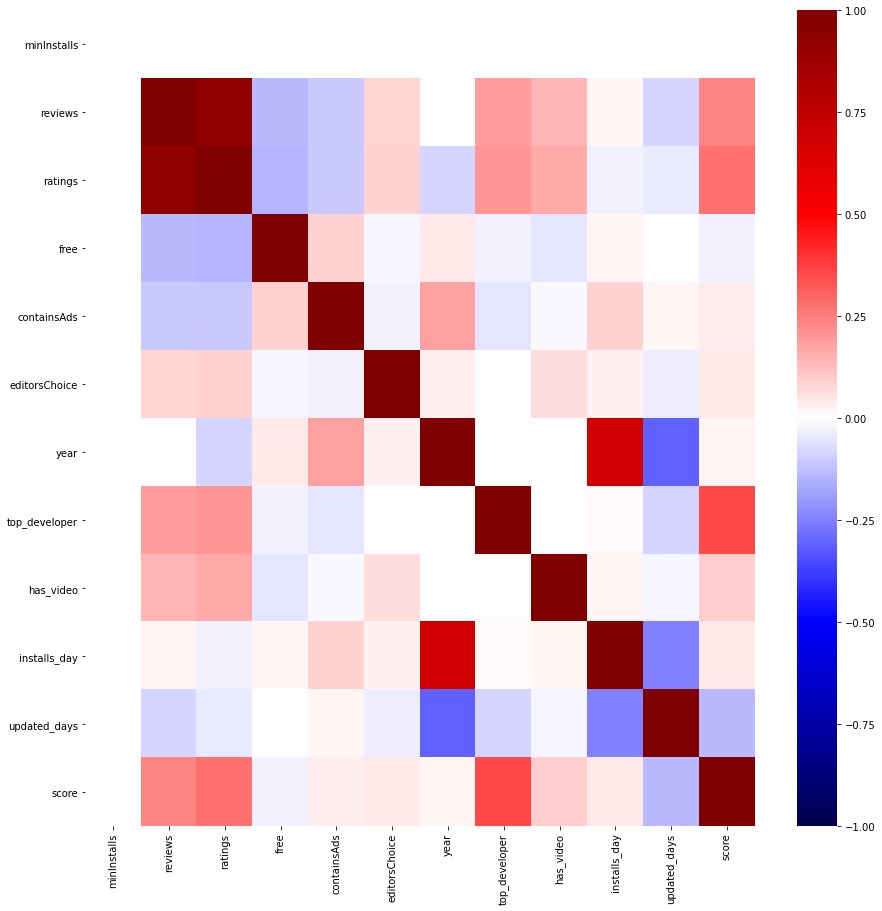

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

#### Observations

Fairly strong correlation between minInstalls and number of ratings. Consider dropping mininstalls given it is bucketed

<ipython-input-6-2159c77aeb6c>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','installs_day','updated_days','score']], ax=ax);
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1000000.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1000000.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1000000.0 results in singular transformations; automatica

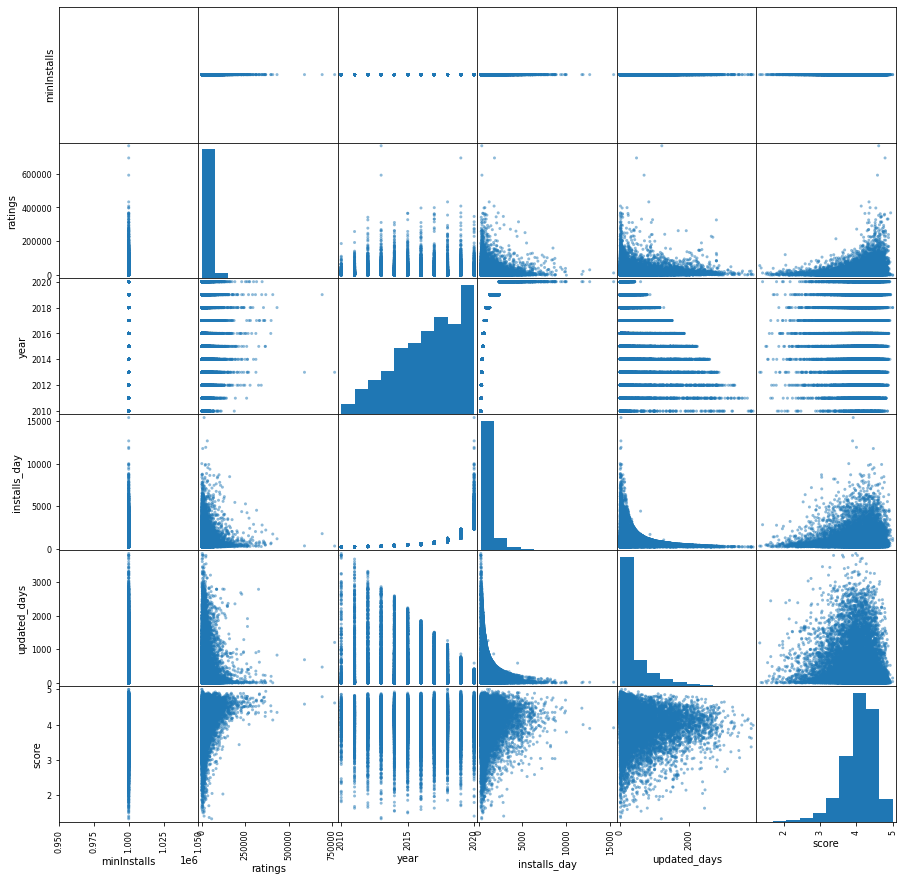

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','installs_day','updated_days','score']], ax=ax);

#### Observations

Score (target) has a left skew - visualise further

Almost exponential shape for ratings?

In [7]:
print('Average app score overall: {:.3f}'.format(df1['score'].mean()))
print('Median app score overall: {:.3f}'.format(df1['score'].median()))

Average app score overall: 4.068
Median app score overall: 4.135


/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


- Total number of ratings: 22144
- Mean of distribution of rating : 4.068499592553282
- Standard deviation: 0.4494795653578535


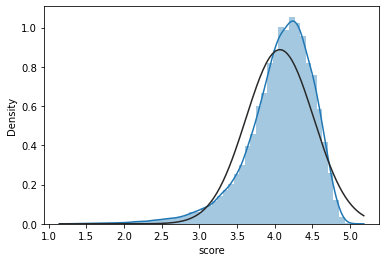

In [8]:
sns.distplot(df1['score'],fit=stats.norm)
print('- Total number of ratings:', len(df1['score']))
print('- Mean of distribution of rating :', np.mean(df1['score']))
print('- Standard deviation:', np.std(df1['score']))

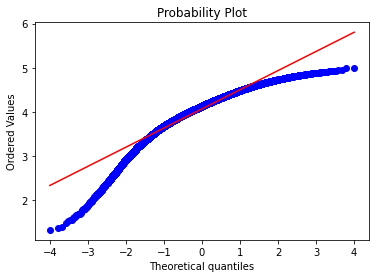

In [9]:
fig = plt.figure() 
prob = stats.probplot(df['score'], plot=plt)

/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


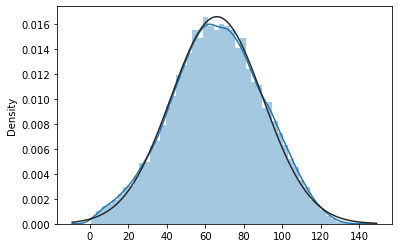

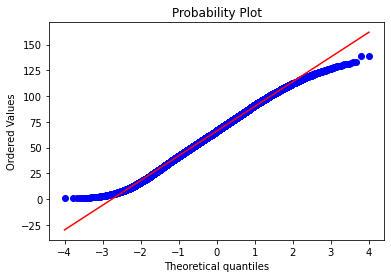

In [10]:
from scipy.stats import boxcox
bcx_target, lam =boxcox(df1['score'])
sns.distplot(bcx_target,fit=stats.norm);
fig = plt.figure()
prob = stats.probplot(bcx_target, plot=plt)

### By number installs

In [11]:
df1.groupby('minInstalls')['score'].mean()

minInstalls
1000000.0    4.0685
Name: score, dtype: float64

In [12]:
df1.groupby('minInstalls')['minInstalls'].count()

minInstalls
1000000.0    22144
Name: minInstalls, dtype: int64

### By content rating

In [13]:
df1.groupby('contentRating')['contentRating'].count()

contentRating
Everyone        16606
Everyone 10+     1084
Mature 17+        897
Teen             3557
Name: contentRating, dtype: int64

In [14]:
df1.groupby('contentRating')['score'].mean()

contentRating
Everyone        4.072003
Everyone 10+    4.104545
Mature 17+      4.011963
Teen            4.055418
Name: score, dtype: float64

### By app genre

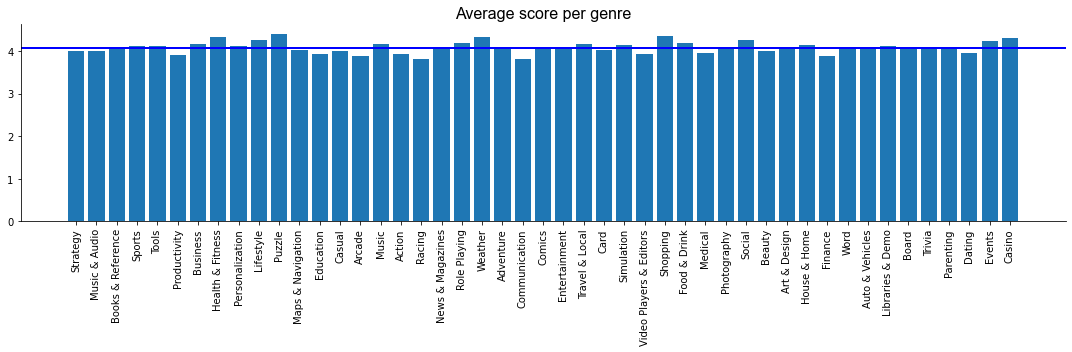

In [15]:
app_genre_score = df.groupby('genre')['score'].mean()
genre_list = df1['genre'].unique()
mean_score = df1['score'].mean()

plt.figure(figsize=[15,5])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(mean_score, label= 'Mean score', color = 'blue', linewidth=2)
plt.bar(genre_list,app_genre_score)   
plt.xticks(genre_list,rotation=90)
plt.title('Average score per genre',family='arial',fontsize=16)
plt.tight_layout()

plt.show;

Does not appear to be significant differences in mean user score across genres

In [16]:
df1.groupby('genre')['genre'].count()

genre
Action                     1067
Adventure                   576
Arcade                      743
Art & Design                144
Auto & Vehicles              90
Beauty                       62
Board                       231
Books & Reference           358
Business                    213
Card                        227
Casino                      154
Casual                     1187
Comics                       63
Communication               405
Dating                       75
Education                  1242
Entertainment              1299
Events                       10
Finance                     426
Food & Drink                107
Health & Fitness            422
House & Home                 46
Libraries & Demo             29
Lifestyle                   583
Maps & Navigation           194
Medical                      75
Music                        78
Music & Audio               656
News & Magazines            172
Parenting                    52
Personalization            1136
Ph

### By whether the app contains ads

In [17]:
df1.groupby('containsAds')['score'].mean()

containsAds
0    4.038108
1    4.075657
Name: score, dtype: float64

Does not appear to be a large difference in apps that do / don't contain ads

### By whether the app is an Editor's Choice

In [18]:
df1.groupby('editorsChoice')['editorsChoice'].count()

editorsChoice
0    21997
1      147
Name: editorsChoice, dtype: int64

In [19]:
df1.groupby('editorsChoice')['score'].mean()

editorsChoice
0    4.066920
1    4.304856
Name: score, dtype: float64

Apps marked as 'Editor's Choice' appear to have higher average score. Makes sense given likely to promote higher quality apps

### By whether the app is free

In [20]:
df1.groupby('free')['free'].count()

free
0       82
1    22062
Name: free, dtype: int64

In [21]:
df1.groupby('free')['score'].mean()

free
0    4.253474
1    4.067812
Name: score, dtype: float64

Paid-for apps appear to have a higher average score. This makes sense given you expect highr quality when you are paying for access

### By top developer in terms of average app score

In [22]:
df1.groupby('top_developer')['score'].mean()

top_developer
0    4.028972
1    4.700722
Name: score, dtype: float64

### By whether the app posting has a video

In [23]:
df1.groupby('has_video')['has_video'].count()

has_video
0    14770
1     7374
Name: has_video, dtype: int64

In [24]:
df1.groupby('has_video')['score'].mean()

has_video
0    4.037369
1    4.130854
Name: score, dtype: float64

In [25]:
df1['ratings'].describe()

count     22144.000000
mean      21360.433300
std       30576.262691
min        1000.000000
25%        5499.750000
50%       11421.500000
75%       24743.250000
max      763222.000000
Name: ratings, dtype: float64

In [26]:
df1['reviews'].describe()

count     22144.000000
mean       7974.226924
std       12598.862218
min         103.000000
25%        1973.750000
50%        4157.000000
75%        8991.000000
max      349005.000000
Name: reviews, dtype: float64